## Old

In [3]:
import os
from datetime import datetime
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import models
from torch.utils.data import DataLoader
from torchvision import datasets
from IPython import get_ipython
from IPython.display import clear_output, display, update_display
from collections import Counter
import pandas as pd

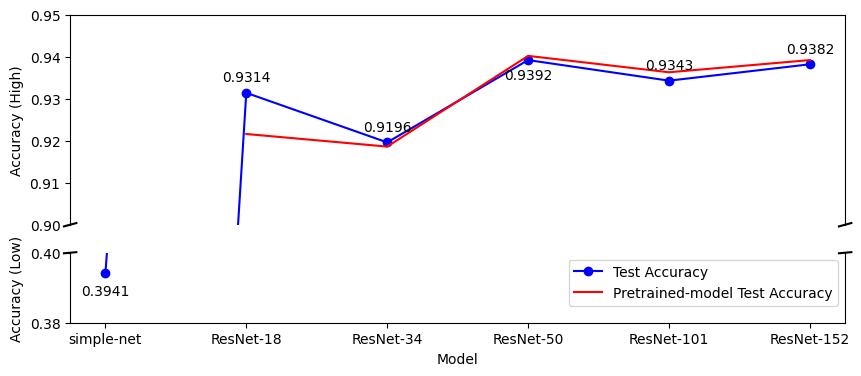

In [174]:
import matplotlib.pyplot as plt

test_acc = [0.3941, 0.9314, 0.9196, 0.9392, 0.9343, 0.9382]
test = [None, 0.9216, 0.9186, 0.9402, 0.9363, 0.9392]
model_names = ['simple-net', 'ResNet-18', 'ResNet-34', 'ResNet-50', 'ResNet-101', 'ResNet-152']

# Create a figure with two subplots (one for each y-axis range)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 4), gridspec_kw={'height_ratios': [3, 1]})

# Plot for the larger range (0.9 to 1)
ax1.plot(model_names, test_acc, marker='o', linestyle='-', color='b', label='Test Accuracy')
ax1.plot(model_names, test, marker='', linestyle='-', color='r', label='Pretrained-model Test Accuracy')
ax1.set_ylim(0.9, 0.95)  # Focus on the range between 0.9 and 1
ax1.xaxis.set_visible(False)

# Data
ax2.plot(model_names, test_acc, marker='o', linestyle='-', color='b', label='Test Accuracy')
ax2.plot(model_names, test, marker='', linestyle='-', color='r', label='Pretrained-model Test Accuracy')
ax2.set_ylim(0.38, 0.4)  # Show the small value

# Break in the y-axis (visual separation between the two plots)
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(labeltop=False)  # Don't show ticks for the upper plot
ax2.xaxis.tick_bottom()

# Add the "break" lines
d = .008 # Size of the diagonal lines in axes coordinates
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # Top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # Top-right diagonal

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # Bottom-right diagonal

# Labels and legends
ax2.set_xlabel('Model')
ax1.set_ylabel('Accuracy (High)')
ax2.set_ylabel('Accuracy (Low)')
ax2.legend()

# Annotate each point with its value
for i, value in enumerate(test_acc):
    if value >= 0.9:  # Annotate points on the upper plot
        offset = 0.002 if value != max(test_acc) else -0.002
        ax1.text(i, value + offset, f'{value:.4f}', ha='center', va='bottom' if offset > 0 else 'top')
    else:  # Annotate points on the lower plot
        ax2.text(i, value - 0.003, f'{value:.4f}', ha='center', va='top')

# Display the plot
plt.savefig('./assets/test_accuracy_for_different_models.png')
plt.show()


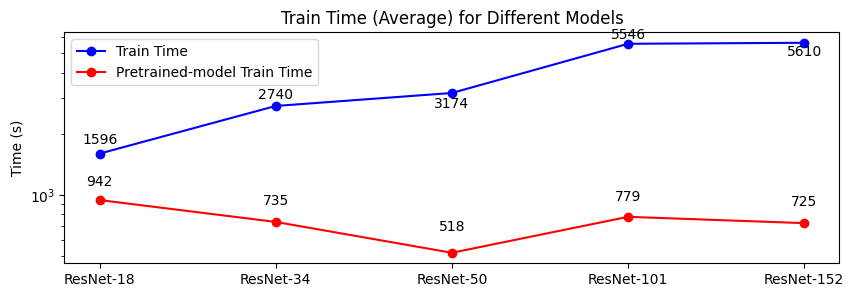

In [176]:
import matplotlib.pyplot as plt

# Data
test_acc = [(28*60+53) // 120 * 114, (87*60+18) // 250 * 137, (59*60+11) // 77 * 69, (118*60+13) // 150 * 118, (166*60+4) // 150 * 85]
test = [(15*60+42), (14*60+34) // 56 * 49, (10*60+10) // 43 * 37, (18*60+49) // 59 * 41, (15*60+43) // 37 * 29]
model_names = ['ResNet-18', 'ResNet-34', 'ResNet-50', 'ResNet-101', 'ResNet-152']

# Create a plot
plt.figure(figsize=(10, 3))
plt.plot(model_names, test_acc, marker='o', linestyle='-', color='b', label='Train Time')
plt.plot(model_names, test, marker='o', linestyle='-', color='r', label='Pretrained-model Train Time')

# Adding labels and title
plt.yscale('log')
plt.title('Train Time (Average) for Different Models')
plt.ylabel('Time (s)')
plt.legend()

# Annotate each point with its value
max_value = max(test_acc[:] + [t for t in test if t is not None])
min_value = min(test_acc[:] + [t for t in test if t is not None])
scale = 5.1
for i, value in enumerate(test_acc):
    # Adjust position slightly based on value
    if value == max_value:
        offset = -0.001
    elif i == 0 or i == len(test_acc) - 1:
        offset = 0.001
    elif (test_acc[i - 1] - value) < (value - test_acc[i + 1]):
        offset = 0.001
    else:
        offset = -0.001

    offset *= 10 ** scale
    plt.text(i, value + offset, f'{value}', ha='center', va='bottom' if offset > 0 else 'top')

for i, value in enumerate(test):
    if value is not None:
        # Adjust position slightly based on value
        if value == min_value:
            offset = 0.001
        elif value == max_value or test[i - 1] is None:
            offset = -0.001
        elif i == 0 or i == len(test) - 1:
            offset = 0.001
        elif (test[i - 1] - value) < (value - test[i + 1]):
            offset = 0.001
        else:
            offset = -0.001

        offset *= 10 ** scale
        plt.text(i, value + offset, f'{value}', ha='center', va='bottom' if offset > 0 else 'top')

# Display the plot
plt.savefig('./assets/train_time_for_different_models.png')
plt.show()


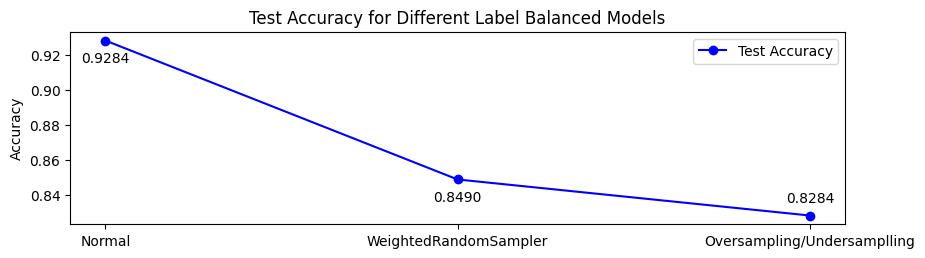

In [8]:
import matplotlib.pyplot as plt

# Data
test_acc = [0.9284, 0.849, 0.8284]
# test = [None, 0.9284, 0.9196]
model_names = ['Normal', 'WeightedRandomSampler', 'Oversampling/Undersamplling']

# Create a plot
plt.figure(figsize=(10, 2.5))
plt.plot(model_names, test_acc, marker='o', linestyle='-', color='b', label='Test Accuracy')
# plt.plot(model_names, test, marker='', linestyle='-', color='r', label='Pretrained-model Test Accuracy')

# Adding labels and title
plt.title('Test Accuracy for Different Label Balanced Models')
plt.ylabel('Accuracy')
plt.legend()

# Annotate each point with its value
max_value = max(test_acc[:])
scale = 6
for i, value in enumerate(test_acc):
    # Adjust position slightly based on value
    if value == max_value:
        offset = -0.001
    elif i == 0 or i == len(test_acc) - 1 or value == min(test_acc):
        offset = 0.001
    elif (test_acc[i - 1] - value) < (value - test_acc[i + 1]):
        offset = 0.001
    else:
        offset = -0.001

    offset *= scale
    plt.text(i, value + offset, f'{value:.4f}', ha='center', va='bottom' if offset > 0 else 'top')

# Display the plot
plt.savefig('./assets/label_balanced_compare.png')
plt.show()


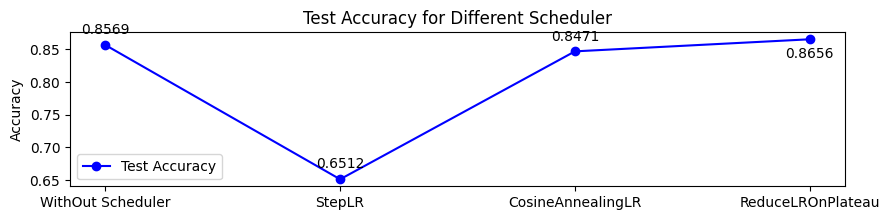

In [5]:
import matplotlib.pyplot as plt

# Data
test_acc = [0.8569, 0.6512, 0.8471, 0.8656]
# test = [None, 0.9284, 0.9196]
model_names = ['WithOut Scheduler', 'StepLR', 'CosineAnnealingLR', 'ReduceLROnPlateau']

# Create a plot
plt.figure(figsize=(10, 2))
plt.plot(model_names, test_acc, marker='o', linestyle='-', color='b', label='Test Accuracy')
# plt.plot(model_names, test, marker='', linestyle='-', color='r', label='Pretrained-model Test Accuracy')

# Adding labels and title
plt.title('Test Accuracy for Different Scheduler')
plt.ylabel('Accuracy')
plt.legend()

# Annotate each point with its value
max_value = max(test_acc)
scale = 12
for i, value in enumerate(test_acc):
    # Adjust position slightly based on value
    if value == max_value:
        offset = -0.001
    elif i == 0 or i == len(test_acc) - 1 or value == min(test_acc):
        offset = 0.001
    elif (test_acc[i - 1] - value) < (value - test_acc[i + 1]):
        offset = 0.001
    else:
        offset = -0.001

    offset *= scale
    plt.text(i, value + offset, f'{value:.4f}', ha='center', va='bottom' if offset > 0 else 'top')

# Display the plot
plt.savefig('./assets/scheduler_comparsion.png')
plt.show()
